In [93]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import requests
import sys

In [199]:
# Countries to collect data for
COUNTRIES = ('US', 'Italy')
# Look back n days
DAYS=30

In [201]:
DATA = {}

death_source = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
infection_source = requests.get('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
dates = [z for z in death_source.text.split('\n')][0].split(',')[-DAYS:]

print("{:8} | {:6} | {:7} {:8} | {:11} | {:6} | {:6}  {:6} {:10}".format("Date", "Cases", "(+/-)", "%Incr", "Mortality", "Deaths", "(+/-)", "%Incr", ""))
print("-" * 80)

for COUNTRY in COUNTRIES:
    deaths = [int(x) for x in [z for z in death_source.text.split('\n') if z.startswith(','+COUNTRY+',')][0].split(',')[-DAYS:]]
    infections = [int(x) for x in [z for z in infection_source.text.split('\n') if z.startswith(','+COUNTRY+',')][0].split(',')[-DAYS:]]

    print("PARSING COUNTRY: {}".format(COUNTRY))
    _mortality = []
    for i in enumerate(zip(infections, deaths)):
        idx = i[0]

        _infections = int(i[1][0])
        _deaths = int(i[1][1])

        last_infection_count = 0
        last_death_count = 0
        infection_increase = 0
        death_increase = 0
        infection_increase_count = 0
        death_increase_total = 0

        if idx > 0:
            last_infection_count = int(infections[idx-1])
            last_death_count = int(deaths[idx-1])

        if last_infection_count > 0:
            infection_increase = round(_infections/last_infection_count*100-100, 1)
            infection_increase_count = _infections-last_infection_count
        if last_death_count > 0:
            death_increase = round(_deaths/last_death_count*100-100, 1)
            death_increase_total = _deaths-last_death_count

        infection_meter = (int((infection_increase/10)) * "=")[:15]
        death_meter = (int((death_increase/10)) * "=")[:15]

        mortality_rate = round(_deaths/_infections*100, 1)
        _mortality.append(mortality_rate)

        print("{:8} | {:6d} | {:7} {:7}% | {:10}% | {:6} | {:6}  {:6}% {:10}".format(
           dates[idx], _infections, '('+str(infection_increase_count)+')', 
            infection_increase, mortality_rate, deaths[idx], '('+str(death_increase_total)+')', 
            death_increase, death_meter))

        c = {}
        c['infections'] = infections # total infections
        c['deaths'] = deaths # total deaths
        c['infection_increase_count'] = infection_increase_count # how many new infections day over day
        c['infection_increase'] = infection_increase # percentage increase
        c['mortality_rate'] = _mortality # current mortality rate percent 
        c['death_increase'] = death_increase # death increase day over day
        DATA[COUNTRY] = c

Date     | Cases  | (+/-)   %Incr    | Mortality   | Deaths | (+/-)   %Incr            
--------------------------------------------------------------------------------
PARSING COUNTRY: US
2/29/20  |     68 | (0)           0% |        1.5% |      1 | (0)          0%           
3/1/20   |     74 | (6)         8.8% |        1.4% |      1 | (0)        0.0%           
3/2/20   |     98 | (24)       32.4% |        6.1% |      6 | (5)      500.0% ===============
3/3/20   |    118 | (20)       20.4% |        5.9% |      7 | (1)       16.7% =         
3/4/20   |    149 | (31)       26.3% |        7.4% |     11 | (4)       57.1% =====     
3/5/20   |    217 | (68)       45.6% |        5.5% |     12 | (1)        9.1%           
3/6/20   |    262 | (45)       20.7% |        5.3% |     14 | (2)       16.7% =         
3/7/20   |    402 | (140)      53.4% |        4.2% |     17 | (3)       21.4% ==        
3/8/20   |    518 | (116)      28.9% |        4.1% |     21 | (4)       23.5% ==        
3/9/2

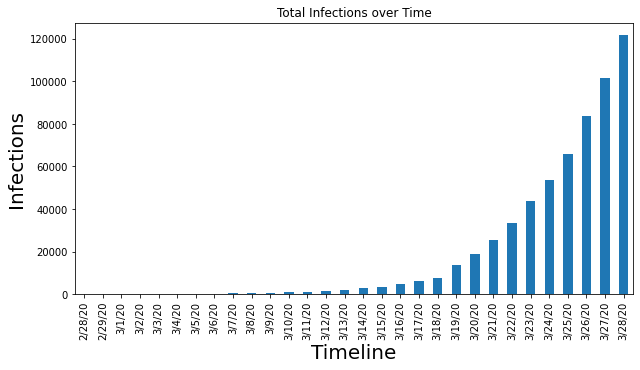

In [192]:
s = pd.Series(DATA['US']['infections'], index=dates)
s.plot.bar(figsize=(10,5))
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Timeline', fontsize=20)
plt.ylabel('Infections', fontsize=20)
plt.title("Total Infections over Time");

In [204]:
df_mortality = pd.DataFrame({"us_mortality": DATA['US']['mortality_rate'],
                  "italy_mortality": DATA['Italy']['mortality_rate'],
                  }, index=dates)
print(df_mortality)

         us_mortality  italy_mortality
2/29/20           1.5              2.6
3/1/20            1.4              2.0
3/2/20            6.1              2.6
3/3/20            5.9              3.2
3/4/20            7.4              3.5
3/5/20            5.5              3.8
3/6/20            5.3              4.2
3/7/20            4.2              4.0
3/8/20            4.1              5.0
3/9/20            3.8              5.0
3/10/20           2.9              6.2
3/11/20           2.8              6.6
3/12/20           2.4              6.6
3/13/20           2.2              7.2
3/14/20           2.0              6.8
3/15/20           1.8              7.3
3/16/20           1.8              7.7
3/17/20           1.7              7.9
3/18/20           1.5              8.3
3/19/20           1.5              8.3
3/20/20           1.3              8.6
3/21/20           1.2              9.0
3/22/20           1.3              9.3
3/23/20           1.3              9.5
3/24/20           1.3    

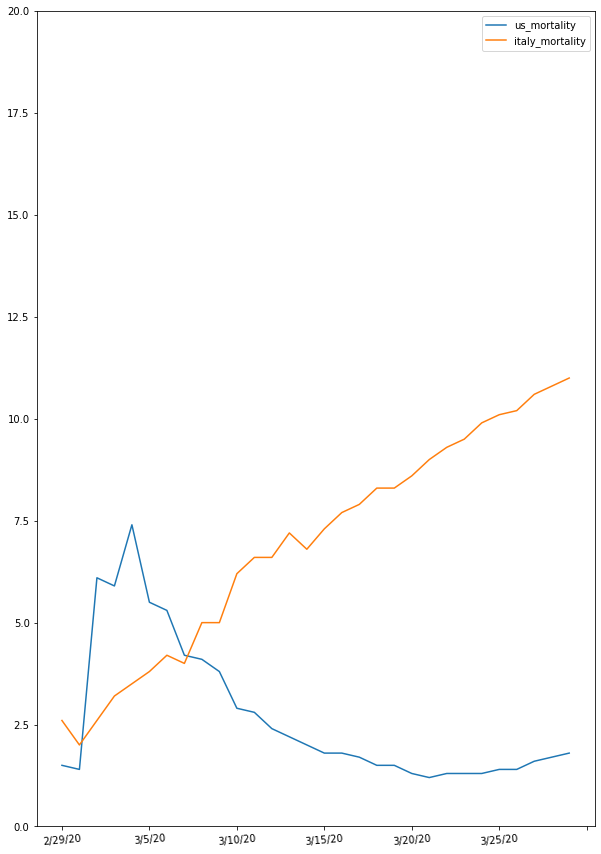

In [205]:
ax = df_mortality.plot(kind='line',
       figsize=(10,15), rot=5, ylim=(0,20))
ax.set_yscale('linear')

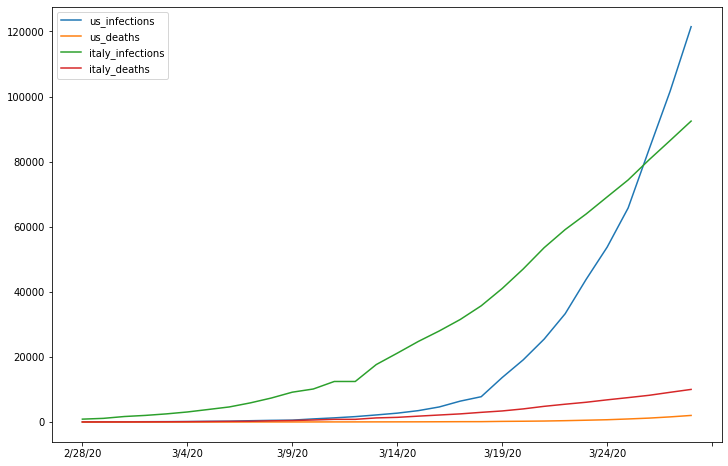

In [198]:
df = pd.DataFrame({"us_infections": DATA['US']['infections'],
                  "us_deaths": DATA['US']['deaths'],
                  "italy_infections": DATA['Italy']['infections'],
                  "italy_deaths": DATA['Italy']['deaths']}, index=dates)
ax = df.plot(kind='line',
       figsize=(12,8))

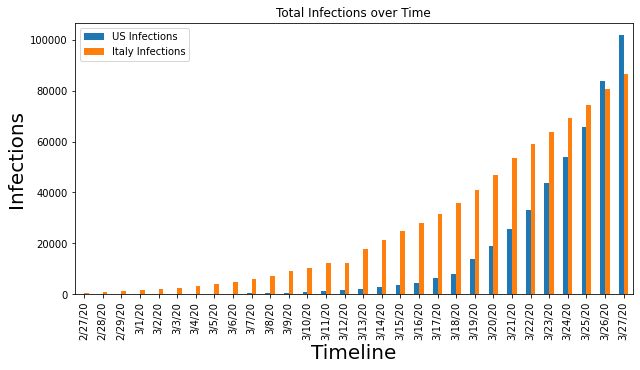

In [89]:
idf = pd.DataFrame({"US Infections": pd.Series(infections, index=dates),
       "Italy Infections": pd.Series(italy_infections, index=dates)})

idf.plot.bar(figsize=(10,5))
plt.xticks(fontsize=10, rotation=90)
plt.xlabel('Timeline', fontsize=20)
plt.ylabel('Infections', fontsize=20)
plt.title("Total Infections over Time");